# EX2_2
Find different words in newspaper article
We'll do this using morphology operators and connected components.


In [57]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call('apt-get install subversion'.split())
    subprocess.call('svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_02a_basic_image_processing/ex2/news.jpg'.split())



In [58]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

figsize = (10, 10)



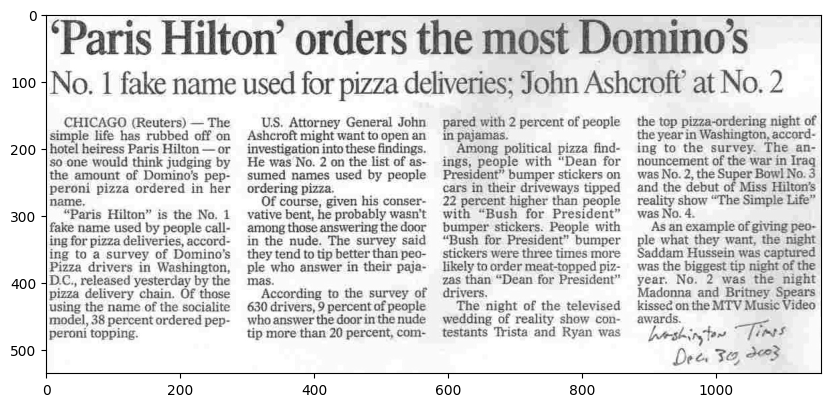

In [59]:
im = cv2.imread("news.jpg")
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=figsize)
plt.imshow(im_gray,cmap="gray",vmin=0,vmax=255)
plt.show()



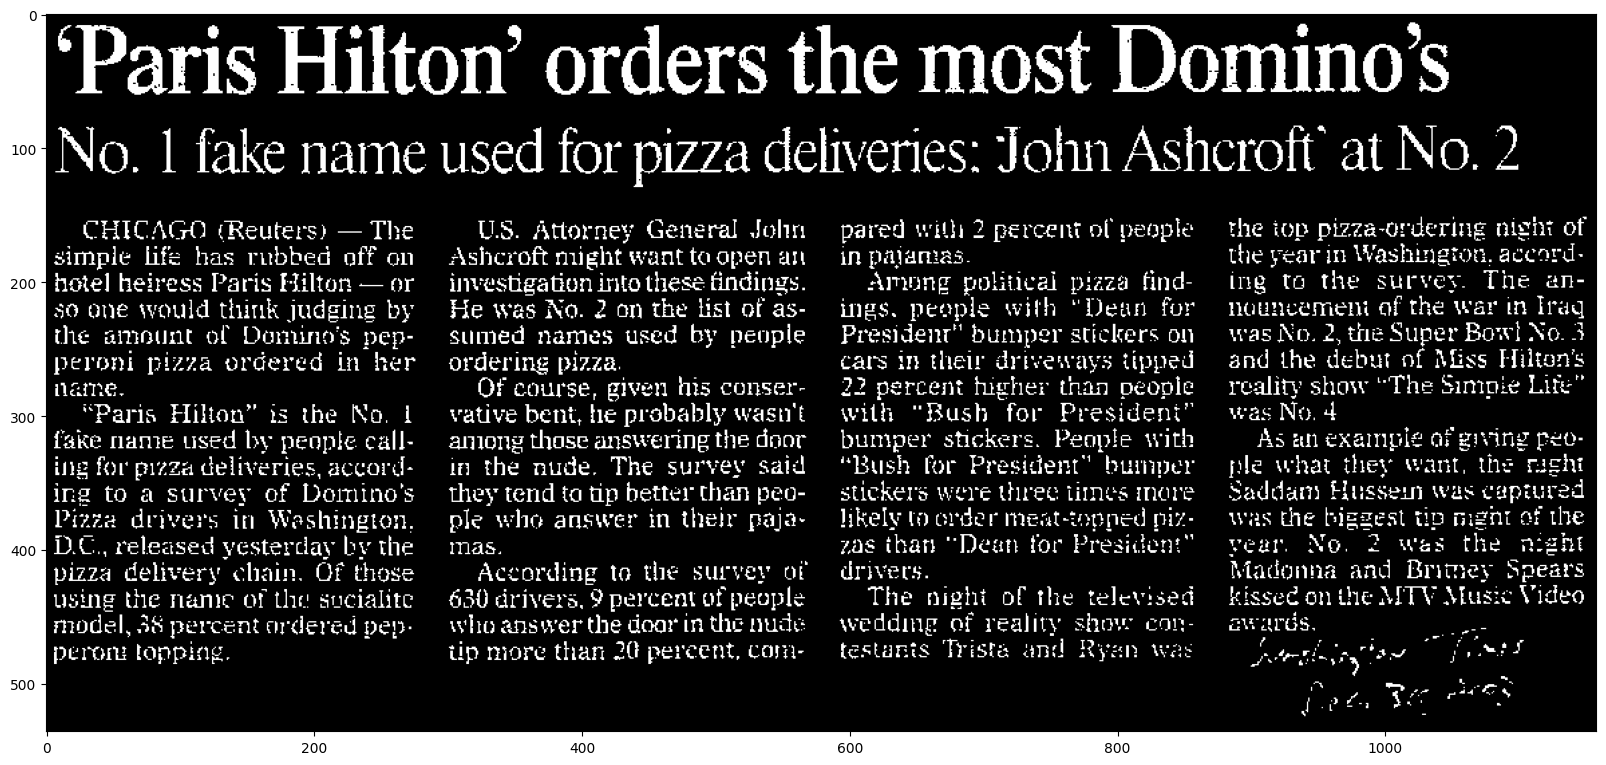

In [60]:
# Assuming you have a grayscale image 'img', you can use cv2.threshold to binarize it
_, im_th = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY_INV)

# Display the binary image
plt.figure(figsize=(20,20))
plt.imshow(im_th, cmap='gray')
plt.show()


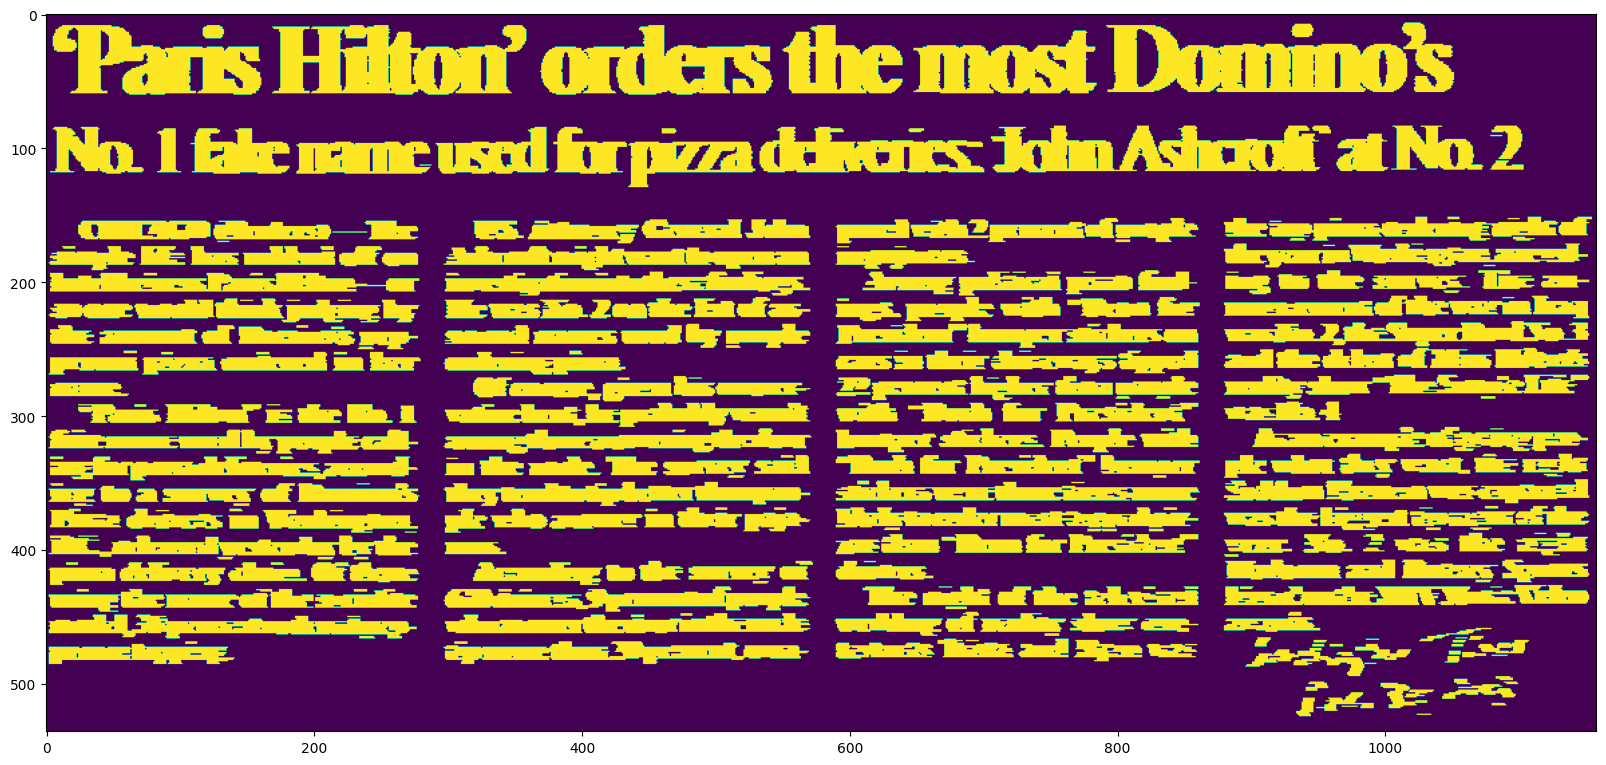

In [65]:
# TODO: next, merge all pixels of the same word together to make one connected component using a morphologic operator
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 1))
im_th = cv2.dilate(im_th, kernel, iterations=1) 


plt.figure(figsize=(20,20))
plt.imshow(im_th)
plt.show()



In [62]:

def find_words(dilated_im,im):
    # TODO: draw rectengles around each word:
    # 1. find all connected components
    # 2. build a mask of only one connected component each time, and find it extremeties
    res = im.copy()
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(dilated_im)

    # Iterate through components (skip background)
    for i in range(1, num_labels):
        # Create mask for each component
        mask = labels == i

        # Draw rectangle around component
        res = plot_rec(mask, res)

    return res
    # TODO: did it came out perfect? Why? Why not?
#It didn't came out perfect. We can notice it rectangle the dots it the headline, the signature has many rectangles. The reason is that the decider of what the mark up is based on distance and connectivity and of course it is not always accurate when the font size's are different.
def plot_rec(mask,res_im):
    # plot a rectengle around each word in res image using mask image of the word
    xy = np.nonzero(mask)
    y = xy[0]
    x = xy[1]
    left = x.min()
    right = x.max()
    up = y.min()
    down = y.max()

    res_im = cv2.rectangle(res_im, (left, up), (right, down), (0, 20, 200), 2)
    return res_im


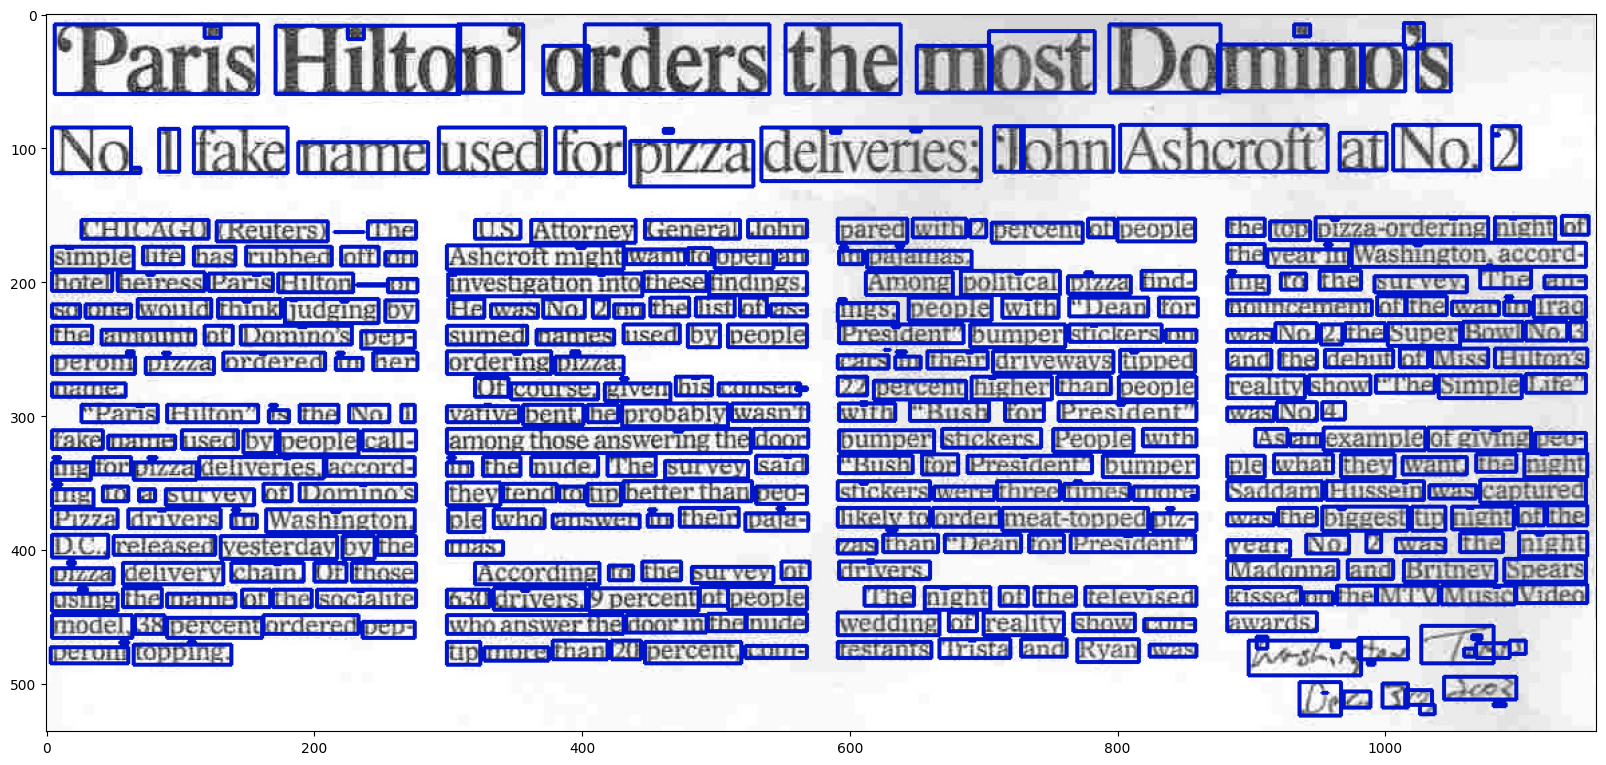

In [63]:
plt.figure(figsize=(20,20))
plt.imshow(find_words(dilated_im,im))
plt.show()




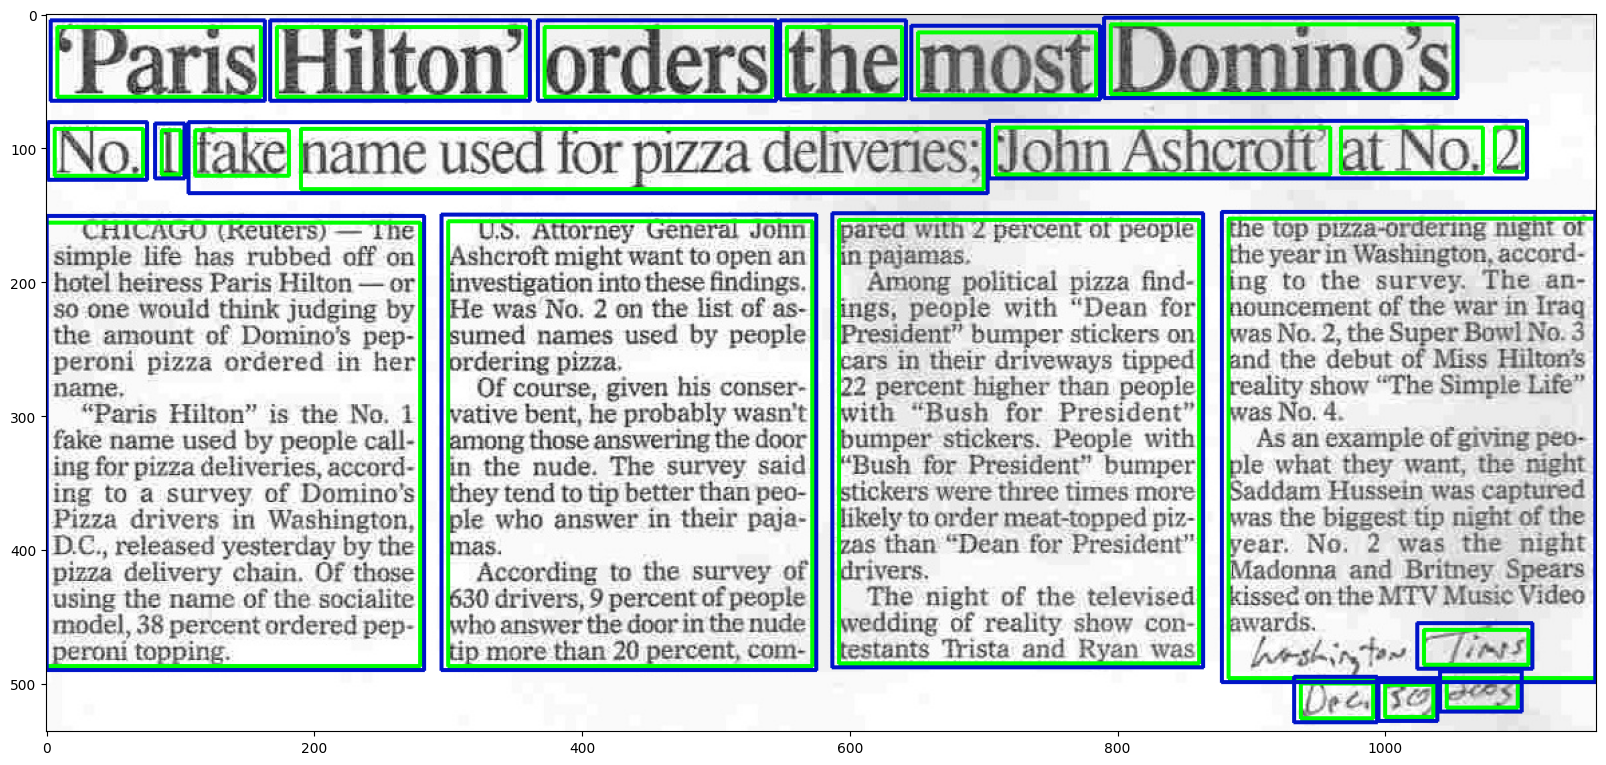

In [64]:
# TODO: now we want to mark only the big title words, and do this ONLY using morphological operators
large_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))  
dilation = cv2.dilate(im_th, large_kernel, iterations=1)
closing = cv2.erode(dilation, large_kernel, iterations=1)

num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(closing)

# Loop through connected components and draw rectangles only for big title words
for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    
    # Skip small components (adjust the threshold as needed)
    if (area > 20) :
        cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Call the find_words function with the original dilated image
result_image = find_words(dilation, im)

plt.figure(figsize=(20, 20))
plt.imshow(result_image)
plt.show()
